In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

from config import api_key


In [16]:
# Loan combined data

final_data = "resources/final_df.csv"

final_df = pd.read_csv(final_data)

final_df.head()


,Unnamed: 0,State,City,FIPS,Pop 2010,Cancer %,Asthma %,Heart Disease %,Pulminary Disease %,Mental Illness %,...,Heat Wave Index,Poverty Rate 2009-2013,Economic Rank,FIPS_place_x,stname,state_fips,census_place,FIPS_place_y,Poverty_2017,Med_Income_2017
0,0,NM,Albuquerque,3502000,545852,5.8,10.4,5.6,5.5,12.6,...,10.98080,0.179,125,2000,New Mexico,35,"Albuquerque city, New Mexico",2000,12.1,51099
1,1,AK,Anchorage,203000,291826,5.1,9.3,4.5,5.0,11.4,...,9.12966,0.079,197,3000,Alaska,2,"Anchorage municipality, Alaska",3000,6.4,83648
2,2,GA,Atlanta,1304000,420003,4.8,9.0,5.0,5.7,12.2,...,18.74350,0.250,17,4000,Georgia,13,"Atlanta city, Georgia",4000,14.9,65345
3,3,TX,Austin,4805000,790390,4.3,8.3,3.9,4.0,11.4,...,15.35470,0.191,3,5000,Texas,48,"Austin city, Texas",5000,9.4,71543
4,4,TX,Corpus Christi,4817000,305215,5.4,8.6,6.5,6.0,12.2,...,14.97450,0.182,188,17000,Texas,48,"Corpus Christi city, Texas",17000,13.7,56602


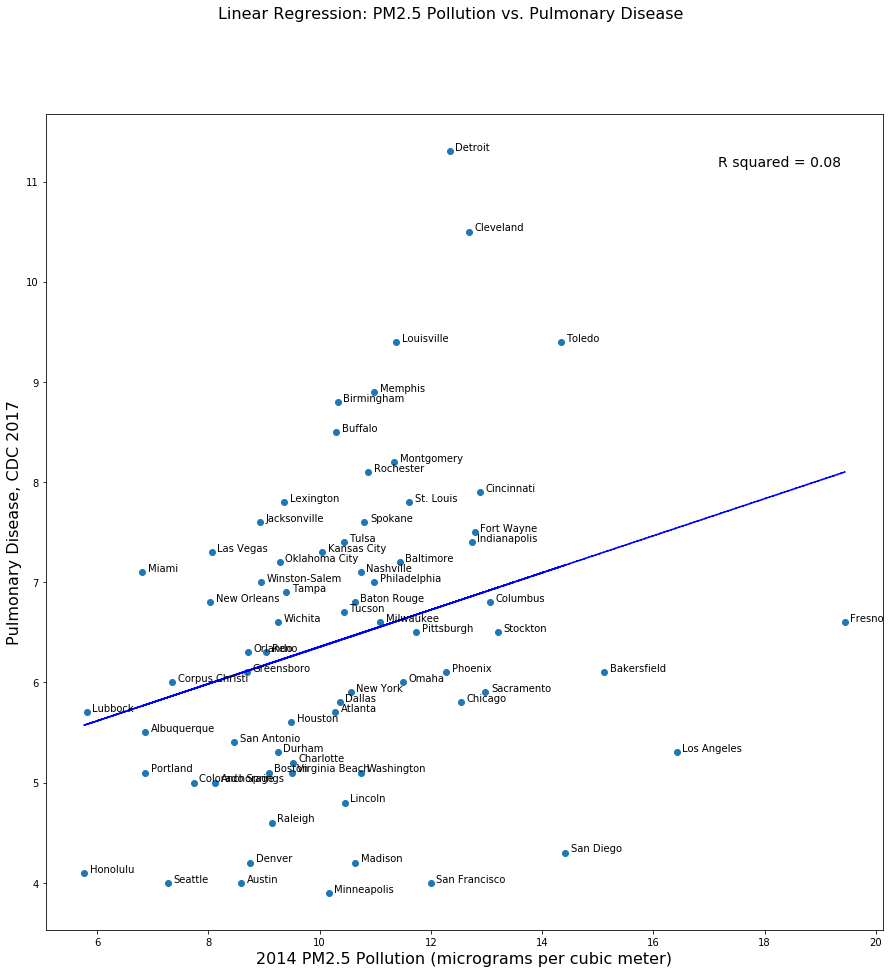

In [18]:
x_axis = final_df['PM2.5 2014']
y_axis = final_df['Pulminary Disease %']

# Runs regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Linear Regression: PM2.5 Pollution vs. Pulmonary Disease", fontsize=16)
ax.set_xlabel("2014 PM2.5 Pollution (micrograms per cubic meter)", fontsize=16)
ax.set_ylabel("Pulmonary Disease, CDC 2017", fontsize=16)

# Creates scatter plot and regression line
ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Prints R squared

ax.text(0.95, 0.95, (f"R squared = {round(r_value**2,2)}"),
        verticalalignment='top', horizontalalignment='right', transform=ax.transAxes,
        fontsize=14)

# Prints city names
for index, row in final_df.iterrows():
    
    x = row['PM2.5 2014']
    y = row['Pulminary Disease %'] 
    city = row["City"]
    
    ax.text((x+.1), (y+.01), city, fontsize=10)
    
# Sets size
plt.gcf().set_size_inches(15, 15)

fig.savefig("output_data/Pulmonary_vs_Pollution.png")

plt.show()

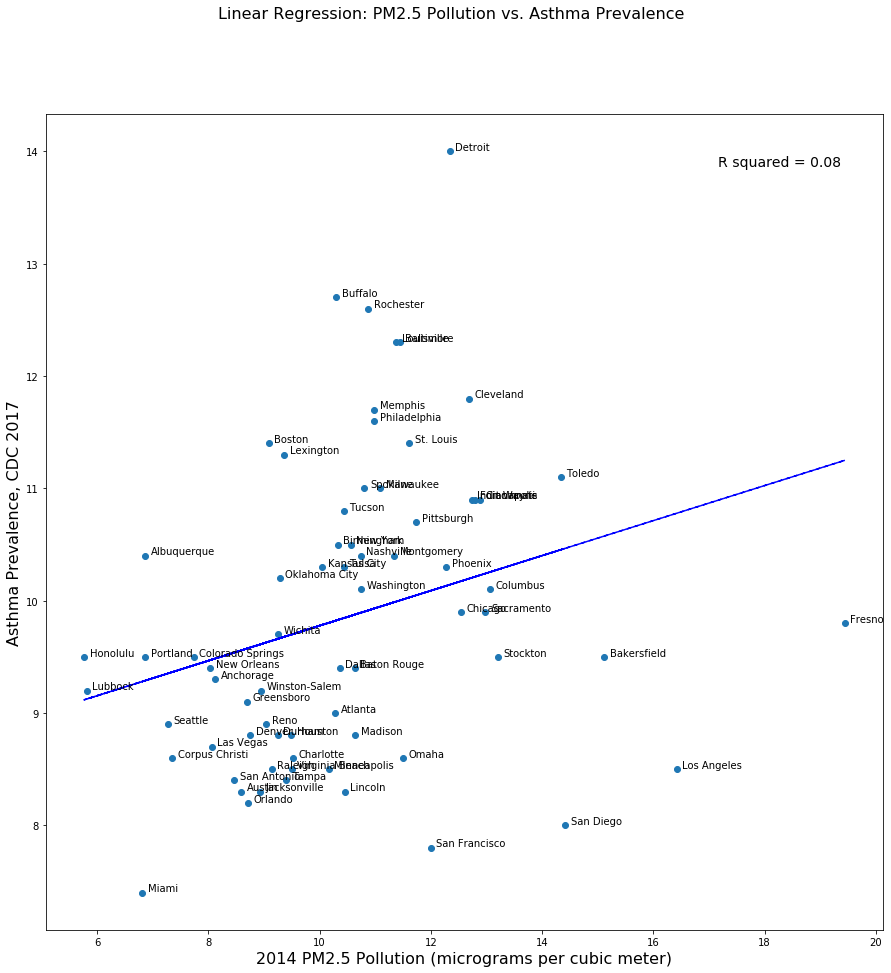

In [19]:
x_axis = final_df['PM2.5 2014']
y_axis = final_df['Asthma %']

# Runs regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Linear Regression: PM2.5 Pollution vs. Asthma Prevalence", fontsize=16)
ax.set_xlabel("2014 PM2.5 Pollution (micrograms per cubic meter)", fontsize=16)
ax.set_ylabel("Asthma Prevalence, CDC 2017", fontsize=16)

# Creates scatter plot and regression line
ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

# Prints R squared

ax.text(0.95, 0.95, (f"R squared = {round(r_value**2,2)}"),
        verticalalignment='top', horizontalalignment='right', transform=ax.transAxes,
        fontsize=14)

# Prints city names
for index, row in final_df.iterrows():
    
    x = row['PM2.5 2014']
    y = row['Asthma %'] 
    city = row["City"]
    
    ax.text((x+.1), (y+.01), city, fontsize=10)
    
# Sets size
plt.gcf().set_size_inches(15, 15)

fig.savefig("output_data/Asthma_vs_Pollution.png")

plt.show()